# Integrated Project

## Introduction

The online store "Ice" sells video games from all over the world. Data related to user and expert game reviews, genre, platform (e.g. Xbox or PlayStation), and historical game sales data are available from open sources. It is necessary to identify patterns that determine whether a game can be said to be successful or not. That way, you can find the games with the most potential and plan your advertising campaign.

Data is available from 2016. Let's imagine that it is December 2016 and you are planning a campaign for 2017.

(Right now, the most important thing is to get experience working with data. It doesn't matter whether forecasting sales for 2017 based on data from 2016 or forecasting sales for 2017 based on data from 2016.).

This dataset contains abbreviations. ESRB is an abbreviation for Entertainment Software Rating Board, which is an independent regulatory organization that evaluates game content and assigns age ratings such as Teen or Mature.

### Steps of the Project
1. Initialization
2. Data Overview
3. Data Pre-Processing
4. Data Analysis
5. User Profile
6. Hypothesis Testing
7. General Conclusion
### Data Description
- Name (name)
- Platforms
- Year_of_Release (year of release)
- Genres
- NA_sales (sales in North America in million USD)
- EU_sales (sales in Europe in million USD)
- JP_sales (sales in Japan in million USD)
- Other_sales (sales in other countries in million USD)
- Critic_Score (review score from critics, maximum 100)
- User_Score (review score from users, maximum 10)
- Ratings (ESRB)

## Initialization

In [1]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# File path : /datasets/games.csv 

data = pd.read_csv('games.csv')

## Data Overview

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

**Findings :**

- Of the total 16715 rows and 11 columns, there are 6 columns that contain missing values
- Columns containing missing values are the 'name', 'year of release', 'genre', 'user score', 'rating' and 'critic score' columns
- For some columns changes will be made to the data type which is not what it should be

## Data Pre-Processing

### Rename columns

In [7]:
data = data.rename(columns=lambda x: x.lower())
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Handle Missing Values - part 1

In [8]:
data.isnull().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

Because in the 'name', 'year of release', and 'genre' columns, only 2 pieces of data are missing, so we will just delete them all, because they won't really affect the overall value.

In [9]:
data = data[(data['name'].notnull())].reset_index(drop=True)

data['year_of_release'] = data['year_of_release'].fillna(0)
data = data[data['year_of_release']!=0].reset_index(drop=True)

data['user_score'] = data['user_score'].replace('tbd', np.nan)

Changes to the data in the 'user score' column containing the contents "tbd" will be changed to missing values.

In [12]:
data.isnull().sum().sort_values()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating             6676
critic_score       8461
user_score         8981
dtype: int64

The remaining columns will be processed in the next chapter

### Change type of data

In [13]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [14]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')

In [15]:
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

#### Handle Missing Values - part 2

In [16]:
data.isnull().sum().sort_values()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating             6676
critic_score       8461
user_score         8981
dtype: int64

In [17]:
def fill_nan_median(dataframe, agg_column, value_column) :
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

Missing values in the 'critic score' and 'user score' columns will be filled in with the median of the respective columns with reference to the 'genre' column.

In [18]:
fill_nan_median(data, 'genre', 'critic_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.5,NaN,NaN


In [19]:
fill_nan_median(data, 'genre', 'user_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,7.4,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.5,7.7,NaN


In [20]:
data.isnull().sum().sort_values()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

The missing values leave 1 column, namely the 'rating' column, which will not be changed in any way, because in this analysis the missing values in the 'rating' column will not be used.

### Total of Sales

In [21]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,NaN


In [22]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [23]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,NaN,31.38


## Data Analysis

### Reviewing games in different years

In [25]:
data_year = data.groupby(['year_of_release'])['name'].count().reset_index().astype('int')
data_year.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


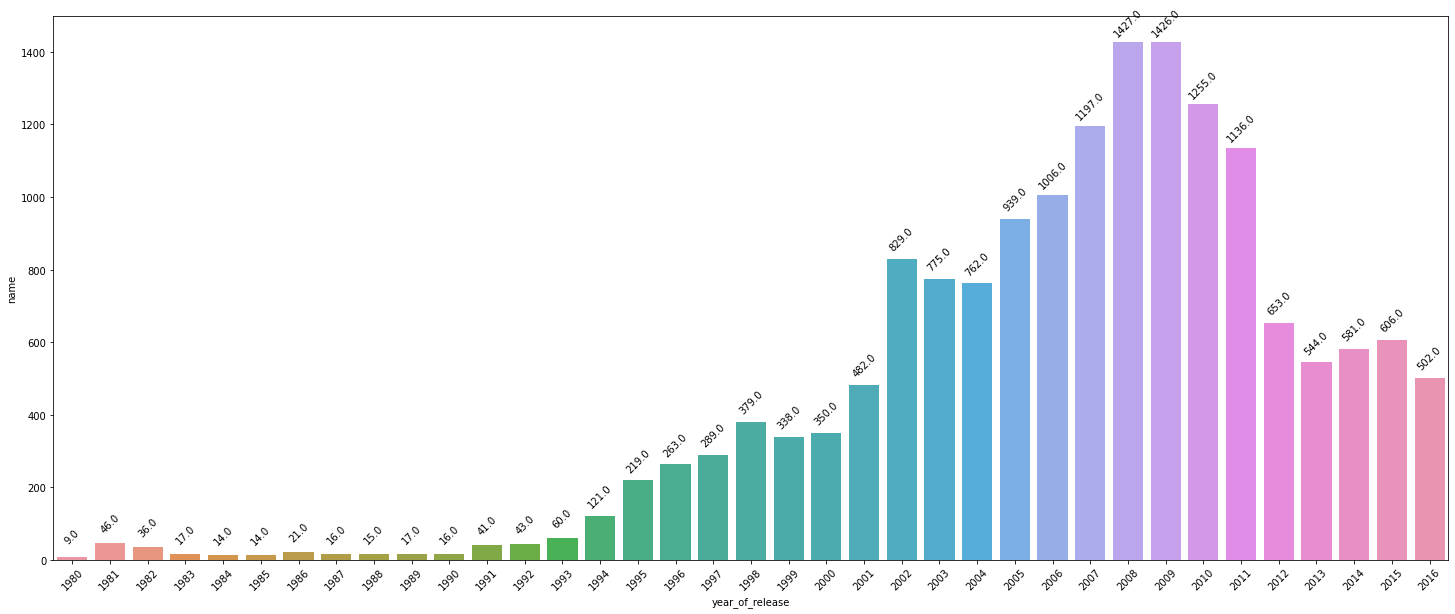

In [89]:
plt.figure(figsize=(25,10))
splot = sns.barplot(data=data_year, x='year_of_release', y='name')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')
plt.xticks(rotation = 45)
plt.show()

If you look at the bar plot graph, the peak years where the most games were created were 2008 and 2009, when various game consoles began to appear.

### Review sales from various platforms

In [28]:
data_platform = data.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()
data_platform.head()

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


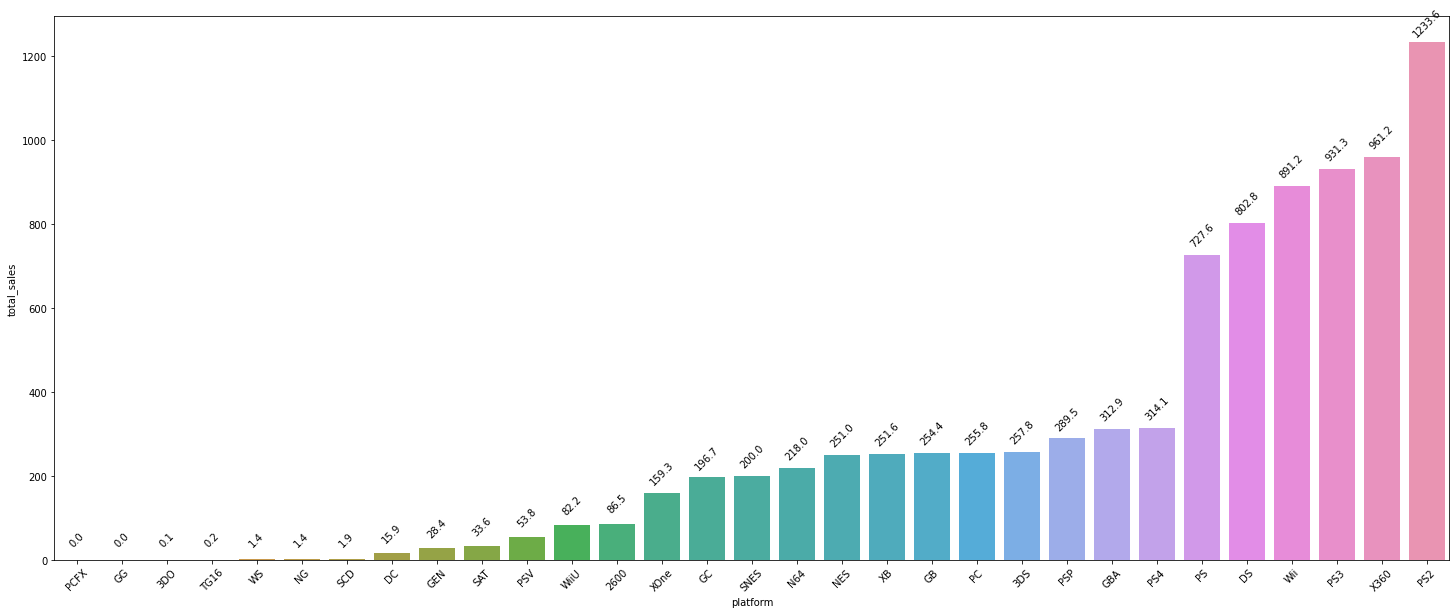

In [87]:
plt.figure(figsize=(25,10))
splot = sns.barplot(data=data_platform, x='platform', y='total_sales')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')
plt.xticks(rotation = 45)
plt.show()

PS2 emerged as the console that released the most games compared to other platforms, because the emergence of PS2 was something new for game lovers|

In [31]:
data_platform_popularity = pd.pivot_table(data, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0).astype('int')
data_platform_popularity.head()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1988,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='year_of_release'>

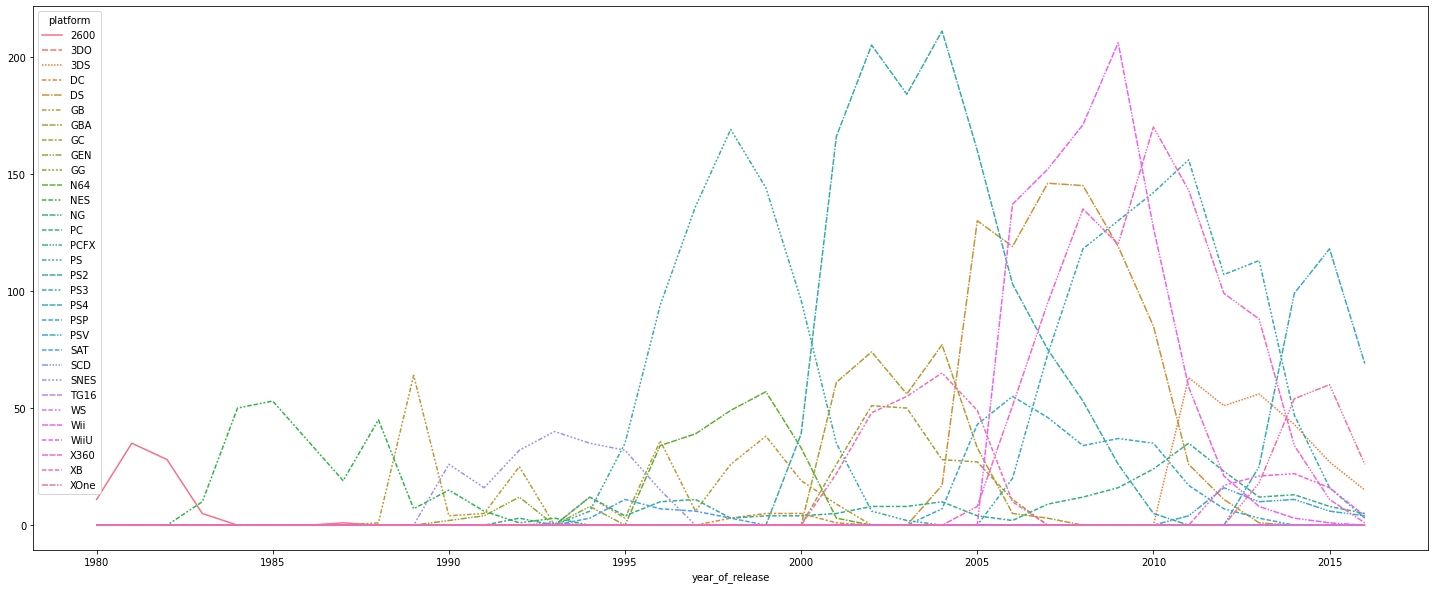

In [32]:
plt.figure(figsize=(25,10))
sns.lineplot(data=data_platform_popularity)

Judging from the popularity tables and graphs, many platforms that were booming in the past year apparently did not last long or became extinct, due to the platform revolution which continues to change, even for the PS2 platform alone which was the platform with the most games during 1980 - 2016, which was its peak. in 2008, as time goes by, the platform will be inferior to the latest platform releases

### Data collection time period

In [33]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,NaN,31.38


In [34]:
data.shape

(16444, 12)

In [36]:
period_data = data[data['year_of_release']>=2012].reset_index(drop=True)
period_data.shape, data.shape

((2886, 12), (16444, 12))

The time period used will be the last 5 years, this aims to make it easier to analyze which games or platforms will boom in the following year.

In [37]:
period_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74.0,7.8,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


### Platform that has the potential to generate profits

In [39]:
period_data_sales = period_data.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()
period_data_sales.head()

,platform,total_sales
0,PSP,11.19
1,DS,12.55
2,Wii,35.37
3,PSV,49.18
4,PC,62.65
5,WiiU,82.19
6,XOne,159.32
7,3DS,194.61
8,X360,236.54
9,PS3,288.79


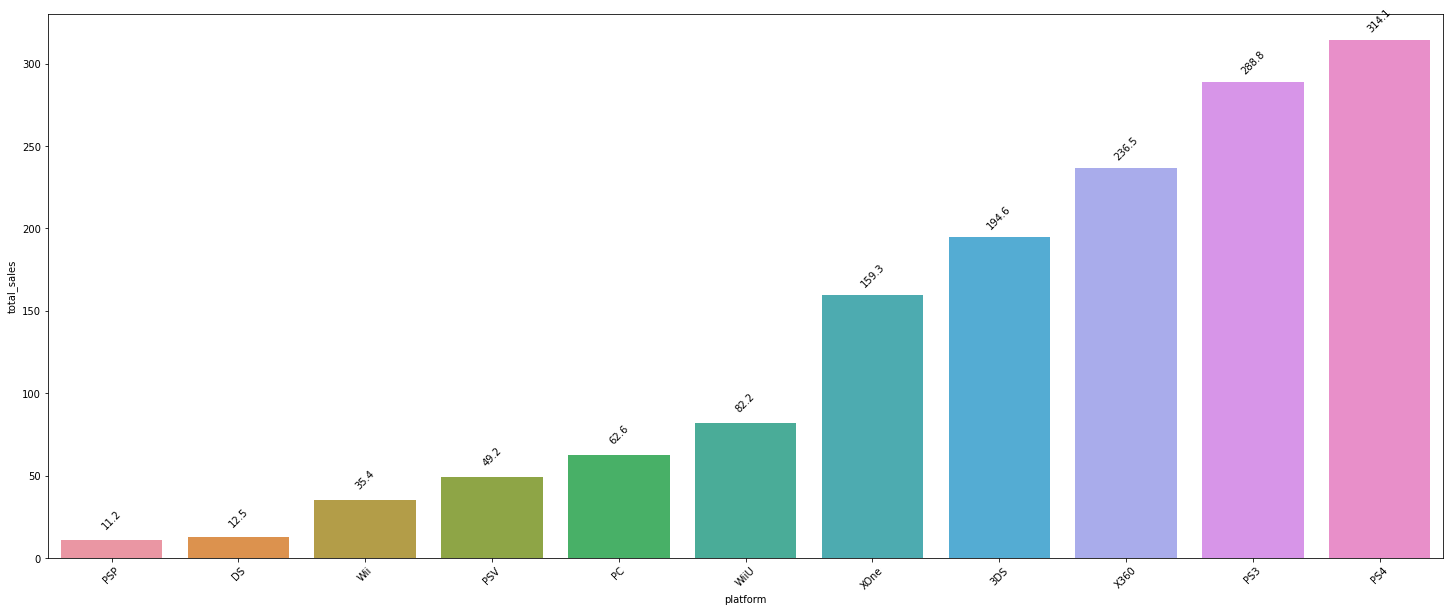

In [88]:
plt.figure(figsize=(25,10))
splot = sns.barplot(data=period_data_sales, x='platform', y='total_sales')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')
plt.xticks(rotation = 45)
plt.show()

The graph above shows that PS4 is the platform that produces the highest sales, where the PS4 platform is one of the newest releases and the quality has increased compared to before, making game consumers interested in buying it even though the price is higher than other platforms.

### Boxplot for all global sales by platform

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

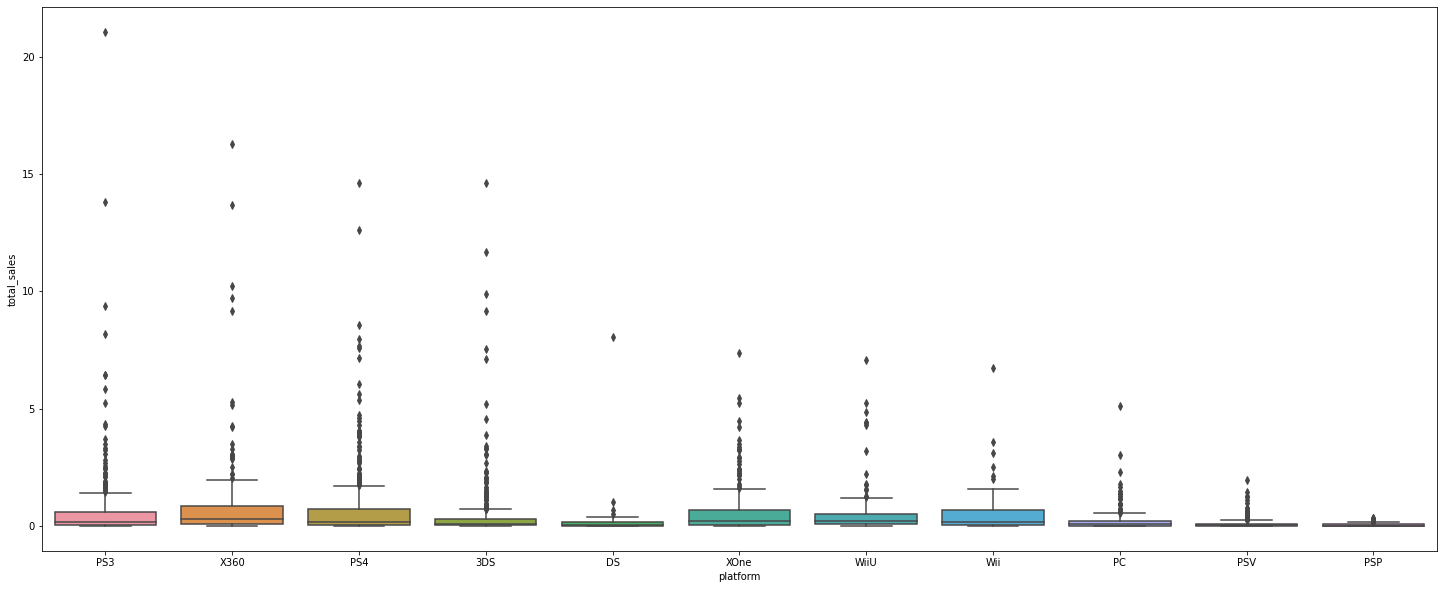

In [41]:
plt.figure(figsize=(25,10))
sns.boxplot(x='platform', y='total_sales', data=period_data)

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

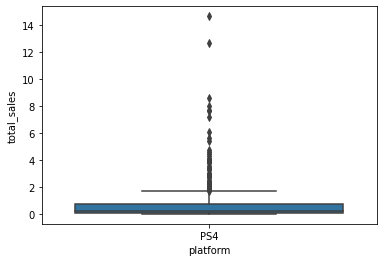

In [42]:
sns.boxplot(x='platform', y='total_sales', data=period_data[period_data['platform']=='PS4'])

The large number of outliers on several platforms indicates that each year will not produce the same sales along with technological developments that trigger improvements in the quality of games or the platform itself.

### User and professional reviews influence sales on the platform

#### PS4

In [43]:
ps4_data = period_data.groupby(['platform', 'name'])['total_sales', 'user_score', 'critic_score'].sum(
).query('platform == "PS4" & user_score > 0 & critic_score > 0').sort_values(by='total_sales', ascending=False).reset_index()

In [44]:
ps4_data.head()

,platform,name,total_sales,user_score,critic_score
0,PS4,Call of Duty: Black Ops 3,14.63,7.4,73.0
1,PS4,Grand Theft Auto V,12.62,8.3,97.0
2,PS4,FIFA 16,8.58,4.3,82.0
3,PS4,Star Wars Battlefront (2015),7.98,7.4,73.0
4,PS4,Call of Duty: Advanced Warfare,7.66,5.7,83.0
...,...,...,...,...,...
387,PS4,Prototype: Biohazard Bundle,0.01,2.0,48.0
388,PS4,Professional Farmer 2016,0.01,7.4,68.0
389,PS4,Chaos;Child,0.01,7.6,66.0
390,PS4,Carmageddon: Max Damage,0.01,5.5,51.0


In [45]:
ps4_data.corr()['total_sales']

total_sales     1.000000
user_score     -0.065482
critic_score    0.351474
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

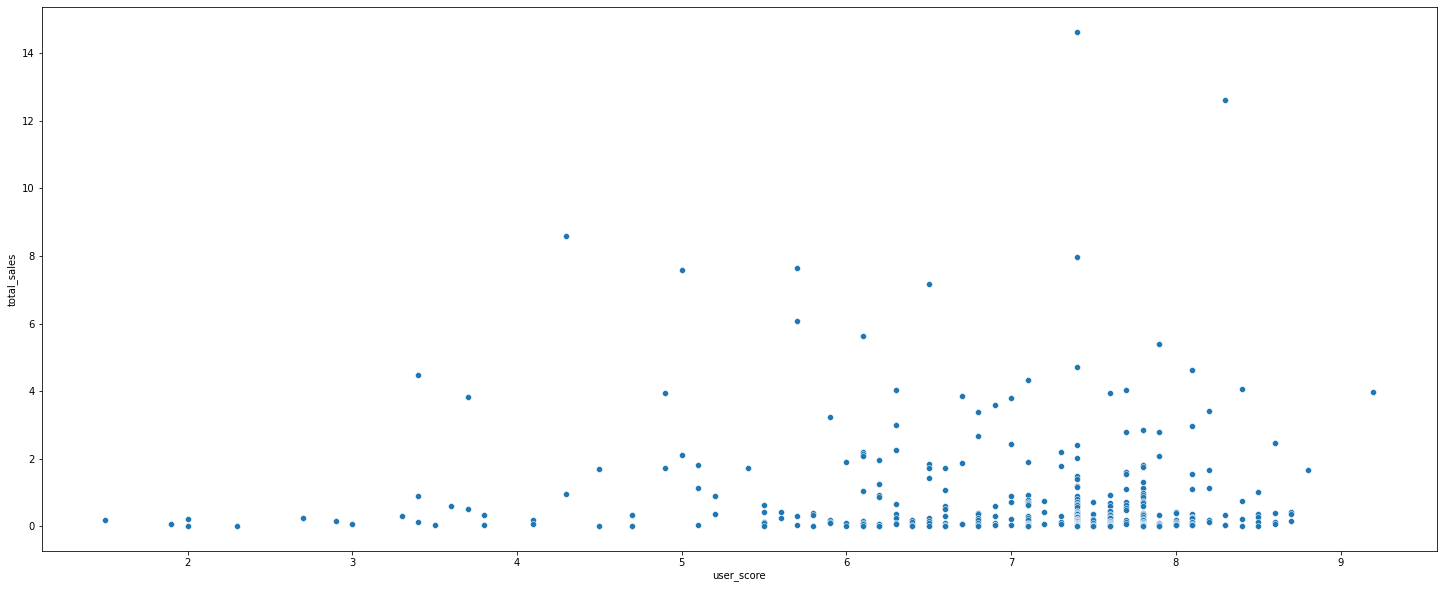

In [46]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=ps4_data, x='user_score', y='total_sales')

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

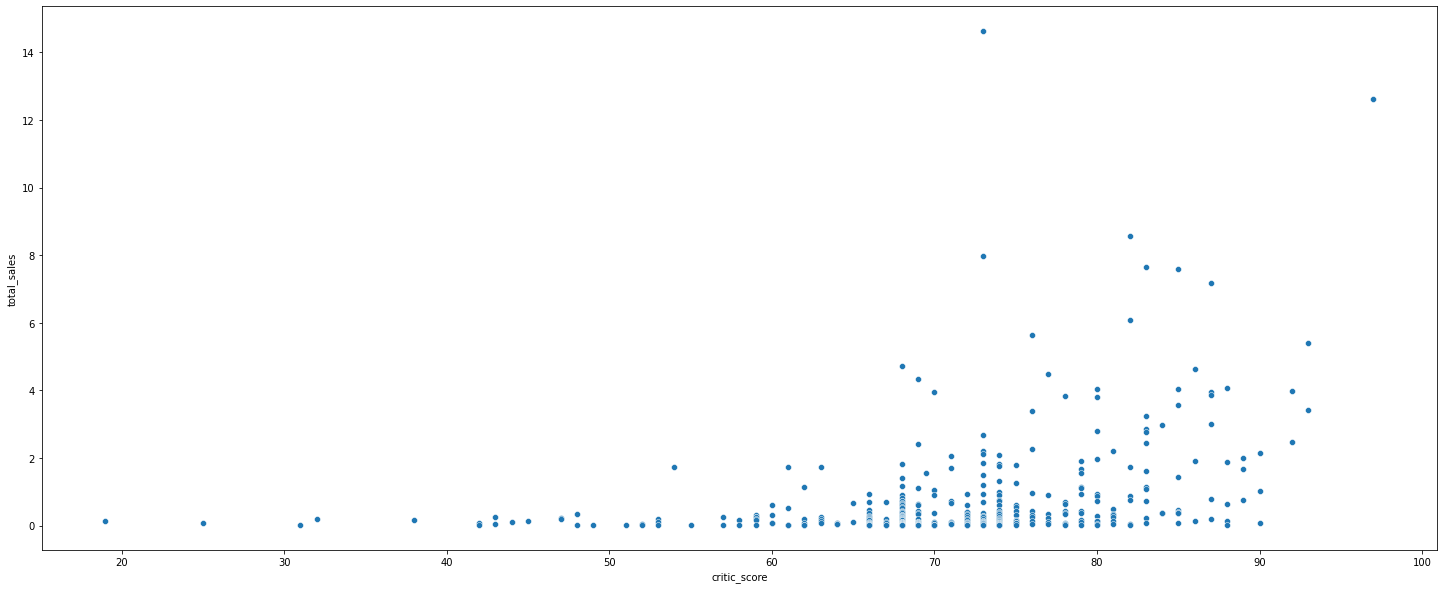

In [47]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=ps4_data, x='critic_score', y='total_sales')

#### XOne

In [48]:
xone_data = period_data.groupby(['platform', 'name'])['total_sales', 'user_score', 'critic_score'].sum(
).query('platform == "XOne" & user_score > 0 & critic_score > 0').sort_values(by='total_sales', ascending=False).reset_index()

In [49]:
xone_data

,platform,name,total_sales,user_score,critic_score
0,XOne,Call of Duty: Black Ops 3,7.39,7.4,73.0
1,XOne,Grand Theft Auto V,5.47,7.9,97.0
2,XOne,Call of Duty: Advanced Warfare,5.26,5.4,81.0
3,XOne,Halo 5: Guardians,4.49,6.4,84.0
4,XOne,Fallout 4,4.22,6.2,88.0
...,...,...,...,...,...
242,XOne,Ride 2,0.01,8.2,69.0
243,XOne,Rocksmith 2014 Edition Remastered,0.01,7.1,69.0
244,XOne,Rugby Challenge 3,0.01,6.6,75.0
245,XOne,Rugby League Live 3,0.01,7.1,68.0


In [50]:
xone_data.corr()['total_sales']

total_sales     1.000000
user_score     -0.105157
critic_score    0.378617
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

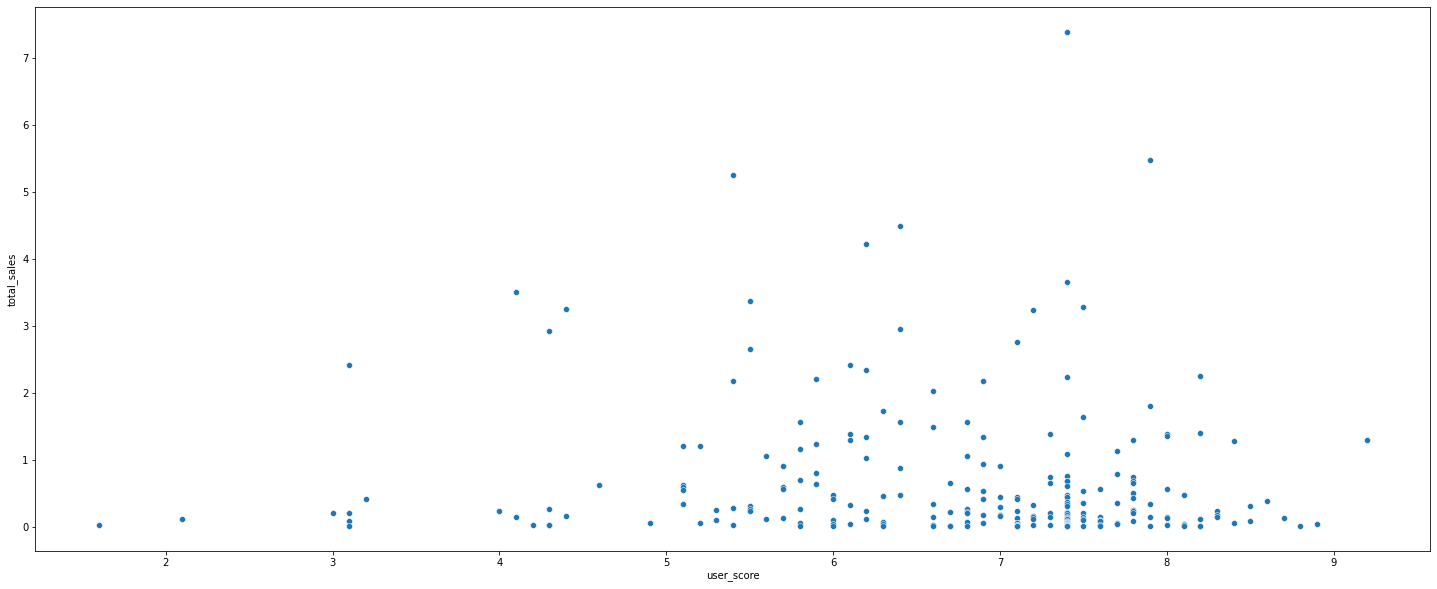

In [51]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=xone_data, x='user_score', y='total_sales')

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

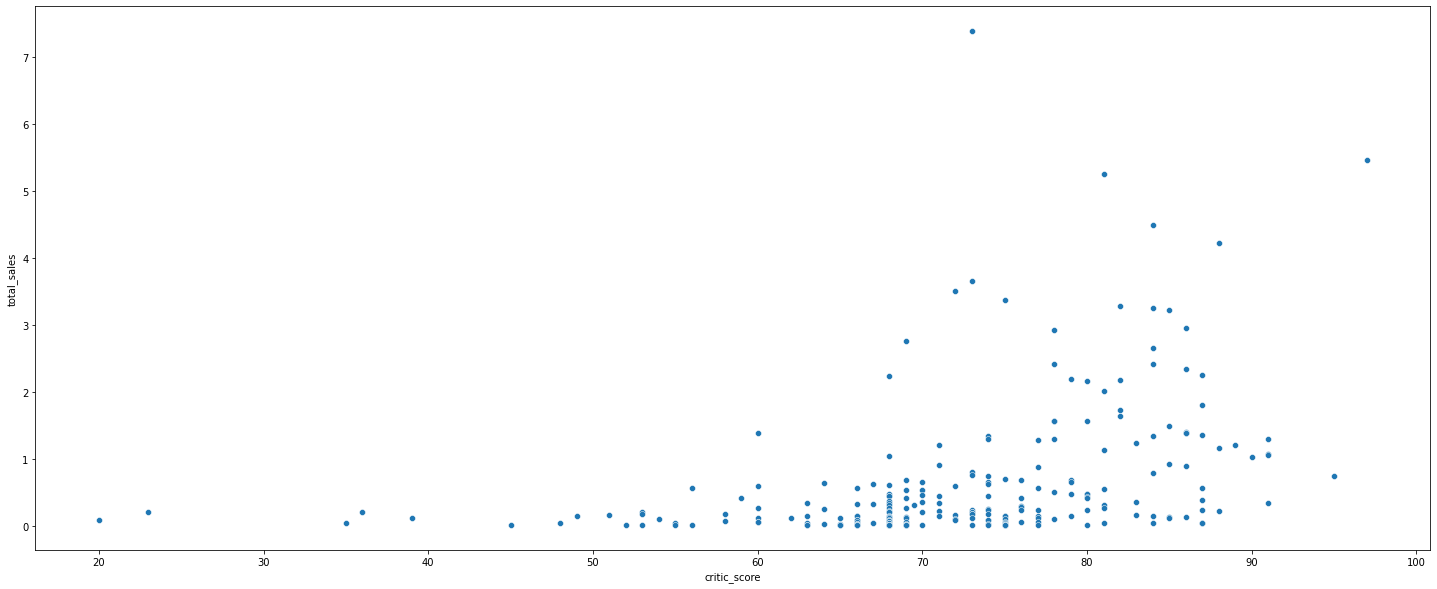

In [52]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=xone_data, x='critic_score', y='total_sales')

#### PC

In [53]:
pc_data = period_data.groupby(['platform', 'name'])['total_sales', 'user_score', 'critic_score'].sum(
).query('platform == "PC" & user_score > 0 & critic_score > 0').sort_values(by='total_sales', ascending=False).reset_index()

In [54]:
pc_data

,platform,name,total_sales,user_score,critic_score
0,PC,Diablo III,5.14,4.0,88.0
1,PC,The Sims 4,3.05,3.9,70.0
2,PC,Guild Wars 2,2.30,7.9,90.0
3,PC,World of Warcraft: Mists of Pandaria,1.82,4.8,82.0
4,PC,StarCraft II: Heart of the Swarm,1.67,7.9,86.0
...,...,...,...,...,...
245,PC,Farming Simulator 15 Expansion Pack,0.01,7.4,68.0
246,PC,Fallout Anthology,0.01,8.3,68.0
247,PC,End of Nations,0.01,7.8,73.0
248,PC,DuckTales: Remastered,0.01,7.6,66.0


In [55]:
pc_data.corr()['total_sales']

total_sales     1.000000
user_score     -0.147673
critic_score    0.258576
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

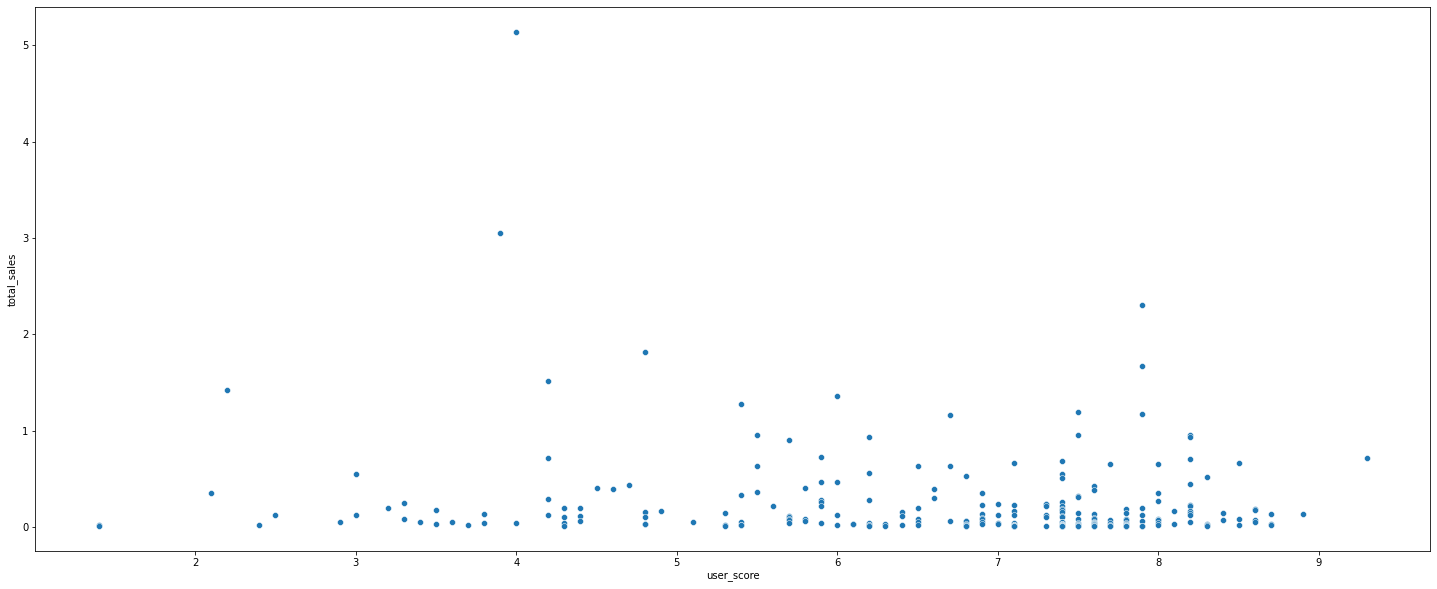

In [56]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=pc_data, x='user_score', y='total_sales')

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

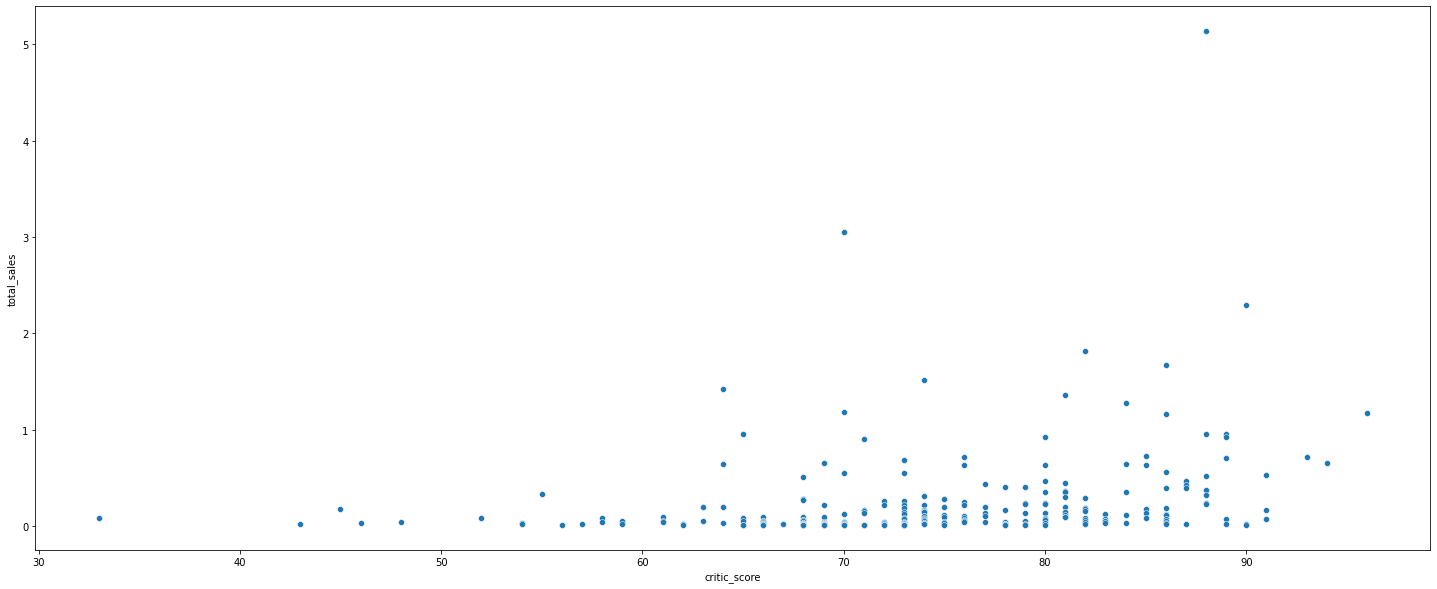

In [57]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=pc_data, x='critic_score', y='total_sales')

#### Findings for all platform

- User score does not really affect total sales on the platform if seen from the correlation value which is minus and close to 0
- The higher the critical score value, the higher the total sales can be, as seen from the positive correlation value
- From the two scatter plots it can be seen that the user score and critic score values actually do not affect total sales even though the correlation values are significantly different

### General distribution of a game by genre

In [58]:
period_data['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

In [60]:
genre_data = period_data.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
genre_data.head()

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


### Data Analysis Conclusion

- A platform and a game will change in quality over time as technology develops
- If drawn from 1980 - 2016, PS2 is the platform that generates the most sales. But if you look at 2012 - 2016, PS4 is the platform with the most sales
- User ratings do not really influence platform sales, and professional ratings influence sales, although not too significantly
- The action and shooter game genre, is the genre with the most sales on each platform

## User Profile

For each region (NA, EU, JP), it will be determined:
- Top 5 platforms. Explain variations in market share from one region to another.
- Top 5 genres. Explain the difference.
- Does the ESRB rating affect sales in each region?

#### 5 Top Platform

In [61]:
period_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74.0,7.8,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [63]:
platform_agg_data = period_data.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales'].sum()
platform_agg_data.head()

,na_sales,eu_sales,jp_sales
platform,,,
3DS,55.31,42.64,87.79
DS,4.59,3.53,3.72
PC,19.12,37.76,0.00
PS3,103.38,106.86,35.29
PS4,108.74,141.09,15.96
PSP,0.13,0.42,10.47
PSV,10.98,11.36,21.04
Wii,17.45,11.92,3.39
WiiU,38.10,25.13,13.01


<AxesSubplot:xlabel='platform'>

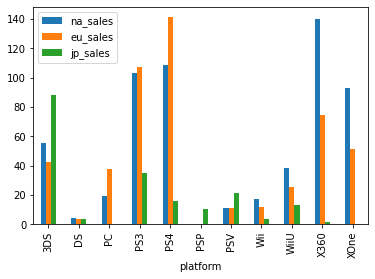

In [64]:
platform_agg_data.plot(kind='bar')

**Findings :**

Each region shows interest in different platforms, such as parts of North America which are very interested in using the X360 compared to other platforms, parts of Europe which prefer PS4 compared to other platforms, and also Japan which relies on 3DS compared to other platforms. It's quite unique when it comes to the origin of the platform

### 5 Top Genre

In [66]:
genre_agg_data = period_data.groupby(['genre'])['na_sales', 'eu_sales', 'jp_sales'].sum()
genre_agg_data.head()

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Adventure,8.92,9.46,8.24
Fighting,19.79,10.79,9.44
Misc,38.19,26.32,12.86
Platform,25.38,21.41,8.63
Puzzle,1.13,1.40,2.14
Racing,17.22,27.29,2.50
Role-Playing,64.00,48.53,65.44
Shooter,144.77,113.47,9.23


<AxesSubplot:xlabel='genre'>

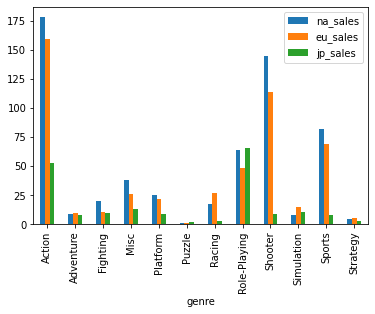

In [67]:
genre_agg_data.plot(kind='bar')

**Findings :**

It is no longer strange that the action genre is very popular with consumers in North America and Europe, but the Japanese region is more interested in the role-playing genre, even though the action genre is no less in terms of sales figures.

### ESRB Rating (Entertainment Software Rating Board)

In [68]:
period_data['rating'].value_counts()

M       498
T       412
E       395
E10+    306
Name: rating, dtype: int64

In [70]:
rating_data = period_data.groupby(['rating'])['na_sales', 'eu_sales', 'jp_sales'].sum().reset_index()
rating_data

,rating,na_sales,eu_sales,jp_sales
0,E,114.37,113.03,28.33
1,E10+,75.70,55.37,8.19
2,M,231.57,193.96,21.20
3,T,66.02,52.96,26.02


**Findings :**

In North America and Europe, they prefer games with a 'mature' rating which are intended for 17 years and over, but in Japan, consumers are more interested in games that can be played by all ages, even though the sales figures don't differ much. This difference can also be seen from the sales of related genres

## Hypothesis Testing

In [71]:
period_data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             1275
total_sales           0
dtype: int64

### Average user ratings for Xbox One and PC platforms are the same.

- Ho = Average user rating for Xbox One and PC platforms is the same
- H1 = Average user rating for Xbox One and PC platforms is not the same

In [72]:
period_data['platform'].value_counts()

PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: platform, dtype: int64

In [73]:
data_xone = period_data[(period_data['platform']=='XOne')].reset_index(drop=True)
data_pc = period_data[(period_data['platform']=='PC')].reset_index(drop=True)

In [74]:
data_xone.shape, data_pc.shape

((247, 12), (250, 12))

In [75]:
np.var(data_xone['user_score']), np.var(data_pc['user_score'])

(1.5664154469012772, 2.44315664)

In [76]:
alpha = 0.05

In [77]:
result_levene = st.levene(data_xone['user_score'], data_pc['user_score']).pvalue
print(result_levene)

if result_levene<alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

0.003852990699263946
Reject null hypothesis


In [78]:
result = st.ttest_ind(data_xone['user_score'], data_pc['user_score'], equal_var=False).pvalue
print(result)

if result<alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

0.2518232001572021
Accept null hypothesis


### The average user rating for the Action and Sports genres is different.

- Ho = Average user rating for the Action and Sports genres is the same
- H1 = Average user rating for the Action and Sports genres is not the same

In [79]:
period_data['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

In [80]:
data_action = period_data[(period_data['genre']=='Action')].reset_index(drop=True)
data_sports = period_data[(period_data['genre']=='Sports')].reset_index(drop=True)

In [81]:
data_action.shape, data_sports.shape

((1031, 12), (268, 12))

In [82]:
np.var(data_action['user_score']), np.var(data_sports['user_score'])

(1.0390768805252502, 2.937288232345734)

In [83]:
alpha = 0.05

In [84]:
result_levene = st.levene(data_action['user_score'], data_sports['user_score']).pvalue
print(result_levene)

if result_levene<alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

7.463171709290685e-34
Reject null hypothesis


In [85]:
result = st.ttest_ind(data_action['user_score'], data_sports['user_score'], equal_var=False).pvalue
print(result)

if result<alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

1.789420203600109e-21
Reject null hypothesis


## General Conclusion

After analyzing the overall data and testing the hypothesis, we arrive at the final conclusion. Where there are several changes that have been made such as:
- In the 'user score' and 'critic score' columns which have null data, they have been filled with median which refers to the genre column, where these two columns will be used to see the correlation with total sales, which in fact these two columns do not have a very significant influence on sale
- From 1980 - 2016, the biggest sales occurred in 2008, where in that year game consoles such as PS2 and others appeared.
- Even though the PS2 holds the record for the most sales since 1980, the PS2 does not really influence the analysis because the data period used in further analysis is only data from the last 5 years
- High sales only occur when a console is released, thus creating outliers that are far from the average range

General conclusions that can be drawn from data analysis for game campaigns in 2017 include:
- The 'Action' genre is the genre with the most sales throughout 2012 - 2016, which could possibly further increase the quality and quantity of this genre for the following year
- PS4 is the platform with the most sales in the last 5 years, so game producers can focus on this platform
- Ratings 'E' and 'M' are 2 ratings that indicate consumer interest in all regions
- Game producers can ask for suggestions from professional users to improve the quality of games that will be produced in the following year
